# Project: Medical Appointment No Shows

# Introduction
This analisys consist to find possible reasons for people who does not show at the scheduled appointments.
The data set is aproximately 100k appoints from Brazilian public health system. We're going to explore this dataset using the following variables:

- **PatientId:** Identification of a patient 
- **AppointmentID:** Identification of each appointment 
- **Gender:** Male or Female 
- **DataMarcacaoConsulta:** The day of the actuall appointment, when they have to visit the doctor 
- **DataAgendamento:** The day someone called or registered the appointment
- **Age:** How old is the patient 
- **Neighbourhood:** Where the appointment takes place
- [**Scholarship:**](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia) True or False, indicates if the patient is in the *Bolsa Familia* program
- **Hipertension:** True or False
- **Diabetes:** True or False 
- **Alcoholism:** True or False 
- **Handcap:** True or False 
- **SMS_received:** 1 or more messages sent to the patient 
- **No-show** "No" indicates if the patient showed up to their appointment and "Yes" if they didn't show up

## Data Wrangling

In [241]:
# Importing Libraries and Loading the data
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# sphinx_gallery_thumbnail_number = 2

df = pd.read_csv('KaggleV2-May-2016.csv')


In [242]:
# let's see from which period theese appointments are
df.AppointmentDay.min(), df.AppointmentDay.max()

('2016-04-29T00:00:00Z', '2016-06-08T00:00:00Z')

In [243]:
#Check missing values and basics info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [244]:
# Getting numerical info
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [245]:
#Check Duplicates
sum(df.duplicated())

0

In [246]:
#Check unique values
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [247]:
# checking all possible values on some columns
print(df.Gender.unique())
print(sorted(df.Age.unique()))
print(sorted(df.Neighbourhood.unique()))
print(df.Scholarship.unique())
print(df.Hipertension.unique())
print(df.Diabetes.unique())
print(df.Alcoholism.unique())
print(df.Handcap.unique())
print(df.SMS_received.unique())
print(df['No-show'].unique())

['F' 'M']
[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO', 'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATOÍRA', 'CENTRO', 'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO', 'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO', 'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE SÃO JOÃO', 'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA', 'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA', 'ILHA DO BOI', 'ILHA DO FRADE', 'ILHA DO PRÍNCIPE', 'ILHAS OCEÂNICAS DE TRINDADE', 'INHANGUETÁ', 'ITARARÉ', 'JABOUR', 'J

### Analisys
After the first analysis we can assume:
  - More than 110k rows and 14 columns
  - 19% of the patients have hipertension
  - 7% of the patients have diabetes
  - 3% of the patients suffers from alcoholism
  - 2% of the patients are handicapped
  ------------------------------------------------
  - There's outilers on Ages column
  - PatientID makes more than one appointment
  - No duplicates
  - No missing values
  - Incosistent data types
  - We don't need appointment ID column
  
#### Data Cleaning
  - Change data types
  - Rename few columns
  - Create new column to calculate time 
   - app_week_day: showing the day of the week the appointment was scheduled
   - app_waiting_time: showing appointment waiting time
  - Remove outliers for Age
  
#### Questions that I want to answer are:
1. What kind of correlation we have in this variables?
2. Based on the correlation, which groups are most affected?
3. Based on the waiting time between the schedule day and the appointment day influences it's no showing up?
4. The patients are receiving SMS after make the appointment?



In [248]:
# renaming all columns to simpler names for our exploration
df.rename(columns={'PatientId': 'patient_id', 'ScheduledDay': 'scheduled_day', 'AppointmentDay': 'appointment_day', 'SMS_received': 'received_sms', 'No-show': 'no_show', 'Handcap': 'handicap' }, inplace=True)
df.rename(columns=lambda x: x.lower(), inplace=True)
df.columns

Index(['patient_id', 'appointmentid', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handicap', 'received_sms',
       'no_show'],
      dtype='object')

In [249]:
df.head()

,patient_id,appointmentid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,received_sms,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [250]:
# Dropping Appointment ID column
df.drop(['appointmentid'], axis=1, inplace=True)

In [251]:
# Formatting data_types
df.patient_id = df.patient_id.apply(lambda patient: str(int(patient)))
df.head()

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,received_sms,no_show
0,29872499824296,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [252]:
# Formatting data types
#Converting data type to int
df["patient_id"] = df["patient_id"].astype('int64')

#Converting data type to datetime
df[['appointment_day', 'scheduled_day']] = df[['appointment_day', 'scheduled_day']].apply(pd.to_datetime)

In [253]:
# Discarting outliers for Age columns
df = df.query('age >= 0')
df = df.query('age <=102')
print(sorted(df.age.unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102]


In [254]:
# removing outliers for Handicap
df.loc[df.handicap > 1, 'handicap'] = 1
df.handicap.unique()

array([0, 1], dtype=int64)

In [255]:
# Creating column "app_waiting_day"
df['app_waiting_day'] = df.appointment_day - df.scheduled_day
df.app_waiting_day.head()

0   -1 days +05:21:52
1   -1 days +07:51:33
2   -1 days +07:40:56
3   -1 days +06:30:29
4   -1 days +07:52:37
Name: app_waiting_day, dtype: timedelta64[ns]

In [256]:
# well it seams that some are treated on the same day that they scheduled
# we can prevent that weird value by calculating the the "absolute value" of this column
# and then converting the "time" to "days"
df.app_waiting_day = df.app_waiting_day.abs().dt.days
df.app_waiting_day.head(10)


0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
8    0
9    1
Name: app_waiting_day, dtype: int64

In [257]:
# Creating column app_week_day
df['app_week_day'] = df.appointment_day.map(lambda day: day.day_name())
df.app_week_day.head()

0    Friday
1    Friday
2    Friday
3    Friday
4    Friday
Name: app_week_day, dtype: object

Now we have all the data to work with

## Exploratory Data Analisys

Let's start exploring the data to asnwer the question that we made before

In [258]:
# Exploring again our stats for this data
df.describe()

,patient_id,age,scholarship,hipertension,diabetes,alcoholism,handicap,received_sms,app_waiting_day
count,1.105210e+05,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,1.474921e+14,37.085694,0.098271,0.197248,0.071869,0.030401,0.020240,0.321034,9.532849
std,2.560928e+14,23.104606,0.297682,0.397923,0.258272,0.171690,0.140823,0.466876,15.027769
min,3.921700e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172457e+12,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172598e+13,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,9.438963e+13,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000
max,9.999816e+14,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,178.000000


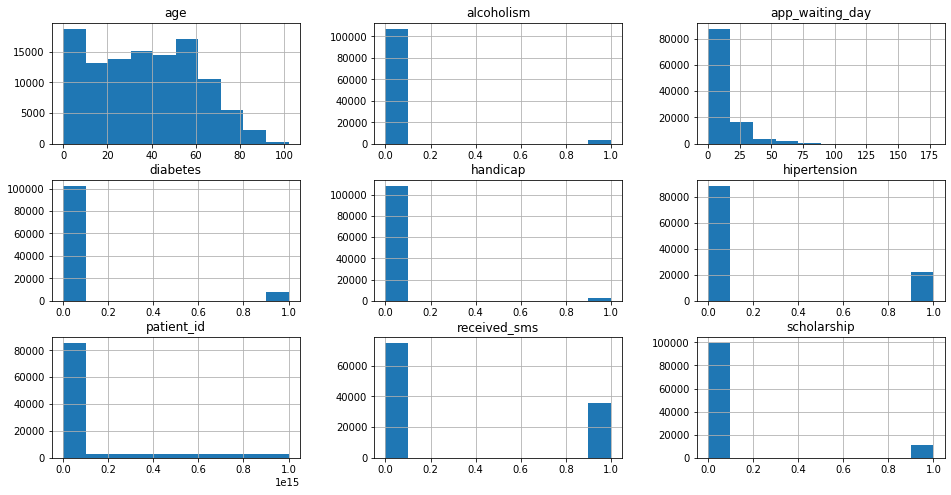

In [259]:
# Analysing using plot
df.hist(figsize=(16,8));

### Most of the Patients
- Are below age 60
- Don't suffer from Hypertension, diabetes or alcoholism.
- Don't receive the SMS
- Aren't included in Bolsa Familia Program

In [260]:
df.head()

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,received_sms,no_show,app_waiting_day,app_week_day
0,29872499824296,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Friday
1,558997776694438,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Friday
2,4262962299951,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Friday
3,867951213174,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Friday
4,8841186448183,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,Friday


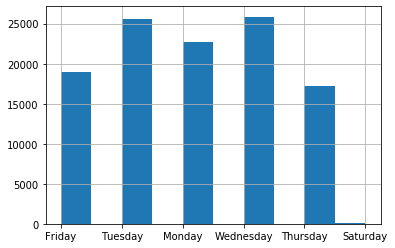

In [261]:
df['app_week_day'].hist()

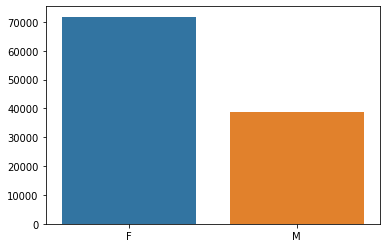

In [262]:
# How does the Gender distribute?
groups = df.groupby(['gender'])
gps = groups.size()
sns.barplot(x=gps.index.tolist(), y=gps.values)

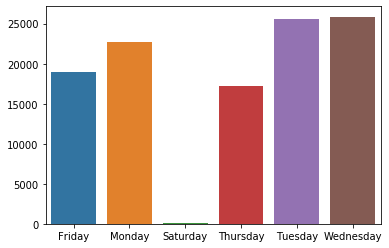

In [263]:
# How does the Week Days are distribute?

groups = df.groupby(['app_week_day'])
gps = groups.size()
sns.barplot(x=gps.index.tolist(), y=gps.values)


In [264]:
df.groupby('gender').count().no_show


gender
F    71834
M    38687
Name: no_show, dtype: int64

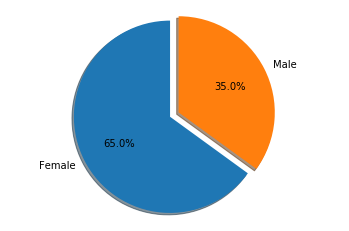

In [265]:
# Pie Chart showing difference between Female and Male making appointments.
labels = 'Female' , 'Male'
explode = [0.1 , 0]
count = df.groupby(df['gender'])['no_show'].count()

fig2, ax1 = plt.subplots()
ax1.pie(count, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [266]:
# Checking days of the week more detailed.
df_day = df.query('no_show == "Yes" ').groupby(['gender', 'app_week_day']).count().patient_id.fillna(value=0).unstack()
df_day.head()


app_week_day,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday
gender,,,,,,
F,2612,3100,7,2151,3422,3299
M,1425,1589,2,1185,1730,1794



## Answering questions

#### 1. What kind of correlation we have in this variables?
  - We can noticed correlation between Gender, Week Days have strong correlation with No show up, which we've had plotted this variables for better understanding (please see above)
  
#### 2. Based on the correlation, which groups are most affected?
 - After analyzing the graphs we can see that Female group is more affect for non showing up at the appointments.
   The numbers show that we have more than 54% of Female being affected by the Brazilian public health system, this numbers can direct us direct to another serious problem which is the Women's health in Brazil.
#### Details: 
##### Female: 71834 (54%)
##### Male: 38687 (46%)
    
#### 3. Based on the waiting time between the schedule day and the appointment day influences it's no showing up?
  - The waiting time has been more on Tuesday and Wednesday, while Saturday there is no fault of attendence. We can assume that most of the people aren't able to make the appoints on week days, wether because of work or some other duties.
  - We can also assume that because most of the people that can't make the appointment is between age 30-45, which is related with work days
  
#### 4. The patients are receiving SMS after make the appointment?
  - It's a very interesting variable, that shows the patients are not receiving the SMS message after making thier schedule.




### Dataset/Analysis limitations

During our entire report we faced limitations and challenges.

- Some informations are not clear in the description of the dataset and you can only find that missing piece by looking out on the forum on some posts
- There is no guarantee that the patientsID are being exposed correctly or even if is an anonymous one
- We don't have acess on how many health units share the same patient databse may causing some inconsistency on the data provided, maybe we have the same patient with different IDs or general data
- The analysis was limited to categorize the patient waiting time / amount of appointments and analysing the mix of the attributes and I have a limited math skill so its not possible to provide relevant insights that could lead us to a relevant conclusion

### Waiting days

We groupped the waiting days in categories:

| waiting time | days |
| -- | -- |
| same day | 0 |
| week | 1 - 7 |
| month | 8 - 30 |
| quarter | 31 - 90 |
| semester | 91 - 180 |
| a lot of time | > 180 |

The no-showing rate increases as time goes by until it reach a quarter.

It reaches lower rates when the patient is attended on the same day and start decreasing after a quarter of waiting time.

We can see on the table bellow the characteristics of patients splitted by the groups.

|              | Attended on the same day | Attended in a short period (week - month) | Attended in a period of 31-90 days (quarter) | Attended in a long period (> 90 days) |
| ------------ | ------------------------ | ----------------------------------------- | -------------------------------------------- | ------------------------------------- |
| Average age  | 35 years                 | 38 years                                  | 37 years                                     | **58 years**                          |
| Scholarship  | **~10%**                 | ~9%                                       | ~6%                                          | ~7%                                   |
| Hipertension | ~18%                     | ~21%                                      | ~15%                                         | **~57%**                              |
| Diabetes     | ~7%                      | 7%~                                       | ~4%                                          | **~14%**                              |

From this analysis we can conclude that the drastic drop on the no-show rating from the period longer than a quarter probably is **due to being an older public** who require regular medical follow-up and tend to schedule more appointments.


## References

- Wikipedia - Sistema Único de Saúde (SUS). https://en.wikipedia.org/wiki/Sistema_%C3%9Anico_de_Sa%C3%BAde. Accessed in April, 2018.
- Dataset release - neighbourhood region information. https://www.kaggle.com/joniarroba/noshowappointments/discussion/38330#. Accessed in April, 2018.
- Kaggle - Applying heatmaps for categorical data analysis. https://www.kaggle.com/tsilveira/applying-heatmaps-for-categorical-data-analysis. Accessed in April, 2018.
- Kaggle - Predicting Show-Up/No-Show. https://www.kaggle.com/somrikbanerjee/predicting-show-up-no-show.
- Kaggle - EDA Medical Appointment No-show. https://www.kaggle.com/lbronchal/eda-medical-appointment-no-show.
- Matplotlib - Basic Pie Chart. https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html
